# Info 290T: Data Mining Lab 2 - Clustering
### michelle.carney@berkeley.edu

In [2]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
reviewers = pd.read_csv('yelp_reviewers.csv')

In [3]:
reviewers.head()

,user_id,q3,q4,q5,q6,q7,q8,q9,q10,q11,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
0,--1Y03CEKR3WDbBjYnsW7A,1,0,0,0,0.00,NaN,NaN,NaN,NaN,...,no,4.00,14,5,0.000000,213.000000,0,0,0.000000,5.000000
1,--2QZsyXGz1OhiD4-0FQLQ,3,0,0,1,1.10,NaN,NaN,0.0,0.0,...,no,1.00,19,14,0.000000,21.833333,1,0,0.333333,4.666667
2,--82_AVgRBsLw6Dhy8sEnA,1,0,0,0,0.00,NaN,NaN,NaN,NaN,...,no,3.00,31,4,0.002275,165.000000,0,0,0.000000,4.000000
3,--8A9o_NeGyt_3kzlXtSdg,3,0,0,1,1.10,NaN,NaN,0.0,0.0,...,no,0.00,8,11,0.002242,61.500000,0,0,0.333333,3.666667
4,--8WbseBk1NjfPiZWjQ-XQ,4,0,0,0,1.39,NaN,NaN,NaN,NaN,...,no,0.25,28,11,0.000444,287.500000,0,0,0.000000,2.750000


# 1. Choose an implementation of k-means and specify it in the google sheet - sklearn.cluster.kmeans


# 2. What is the best choice of k according to the silhouette metric for clustering q4-q6 (# of cool, funny, useful votes) combined. Only consider 2 <= k <= 8. 
# Answer = 2 - see plot below - it has the highest silhouette metric (0.99)
- NOTE: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder. 


In [3]:
reviewers_q4_q6 = reviewers.loc[:, 'q4':'q6']
reviewers_q4_q6.head()

,q4,q5,q6
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,0


In [10]:
km = KMeans(n_clusters=8)
%time km.fit(reviewers_q4_q6)
clusters = km.labels_.tolist()


CPU times: user 7.12 s, sys: 1.58 s, total: 8.7 s
Wall time: 5.3 s


In [36]:
# clusters

In [12]:
silhouette_k8 = silhouette_score(reviewers_q4_q6[0:10000], clusters[0:10000])

In [13]:
km = KMeans(n_clusters=7)
%time km.fit(reviewers_q4_q6)
clusters = km.labels_.tolist()
silhouette_k7 = silhouette_score(reviewers_q4_q6[0:10000], clusters[0:10000])

CPU times: user 5.66 s, sys: 1.17 s, total: 6.83 s
Wall time: 4.19 s


In [14]:
km = KMeans(n_clusters=6)
%time km.fit(reviewers_q4_q6)
clusters = km.labels_.tolist()
silhouette_k6 = silhouette_score(reviewers_q4_q6[0:10000], clusters[0:10000])

CPU times: user 5.57 s, sys: 1.06 s, total: 6.64 s
Wall time: 3.87 s


In [15]:
km = KMeans(n_clusters=5)
%time km.fit(reviewers_q4_q6)
clusters = km.labels_.tolist()
silhouette_k5 = silhouette_score(reviewers_q4_q6[0:10000], clusters[0:10000])

CPU times: user 4.58 s, sys: 826 ms, total: 5.41 s
Wall time: 3.14 s


In [16]:
km = KMeans(n_clusters=4)
%time km.fit(reviewers_q4_q6)
clusters = km.labels_.tolist()
silhouette_k4 = silhouette_score(reviewers_q4_q6[0:10000], clusters[0:10000])

CPU times: user 3.52 s, sys: 383 ms, total: 3.9 s
Wall time: 2.09 s


In [17]:
km = KMeans(n_clusters=3)
%time km.fit(reviewers_q4_q6)
clusters = km.labels_.tolist()
silhouette_k3 = silhouette_score(reviewers_q4_q6[0:10000], clusters[0:10000])

CPU times: user 2.16 s, sys: 62.8 ms, total: 2.22 s
Wall time: 1.2 s


In [18]:
km = KMeans(n_clusters=2)
%time km.fit(reviewers_q4_q6)
clusters = km.labels_.tolist()
silhouette_k2 = silhouette_score(reviewers_q4_q6[0:10000], clusters[0:10000])

CPU times: user 1.7 s, sys: 52.4 ms, total: 1.75 s
Wall time: 944 ms


In [ ]:
#df.plot
#silouhette score  = higher the better
#within cluser var = initertia (look at elbow method)

In [24]:
silhouette = [silhouette_k2, silhouette_k3, silhouette_k4, silhouette_k5, silhouette_k6, silhouette_k7, silhouette_k8]

In [26]:
count_k = [2, 3, 4, 5, 6, 7, 8]

In [31]:
count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, 0.99509138416149867), (3, 0.98460829146058293), (4, 0.9636733044136836), (5, 0.91080778703018872), (6, 0.88827669865599745), (7, 0.83271279406293053), (8, 0.7946395569979976)]


In [30]:
for a in count_silhouette:
    print(a)

(2, 0.99509138416149867)
(3, 0.98460829146058293)
(4, 0.9636733044136836)
(5, 0.91080778703018872)
(6, 0.88827669865599745)
(7, 0.83271279406293053)
(8, 0.7946395569979976)


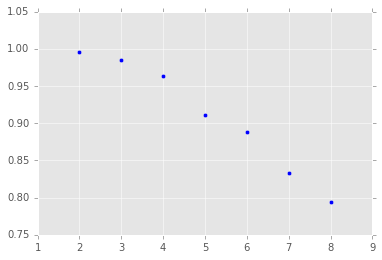

In [37]:
plt.scatter(*zip(*count_silhouette))

In [57]:
# plt.plot(*zip(*count_silhouette))

# 3. Answer question 2 but using the log of the features (q8-q10) 

# Answer - k=2 has the highest silhouette score

In [44]:
# reviewers.head()
reviewers_q810 = reviewers.loc[:, 'q8':'q10']
reviewers_q8_q10 = reviewers_q8_q10.dropna() #remove na to calc clusters
len(reviewers_q8_q10)

33426

In [51]:
silhouette = []
for num_clusters in range(2,9):
    km = KMeans(n_clusters=num_clusters)
    %time km.fit(reviewers_q8_q10)
    clusters = km.labels_.tolist()
    silhouette.append(silhouette_score(reviewers_q8_q10[0:10000], clusters[0:10000]))

CPU times: user 476 ms, sys: 39.9 ms, total: 516 ms
Wall time: 313 ms
CPU times: user 738 ms, sys: 7.34 ms, total: 745 ms
Wall time: 381 ms
CPU times: user 1.14 s, sys: 15.6 ms, total: 1.15 s
Wall time: 694 ms
CPU times: user 1.8 s, sys: 68.2 ms, total: 1.86 s
Wall time: 992 ms
CPU times: user 1.39 s, sys: 39.1 ms, total: 1.42 s
Wall time: 732 ms
CPU times: user 1.64 s, sys: 62.9 ms, total: 1.7 s
Wall time: 957 ms
CPU times: user 2.01 s, sys: 86.4 ms, total: 2.1 s
Wall time: 1.1 s


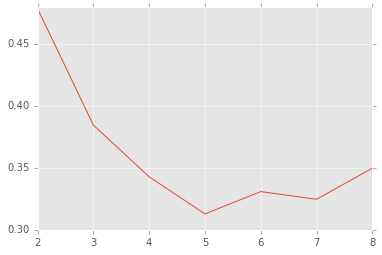

In [55]:
count_k = [2, 3, 4, 5, 6, 7, 8]
count_silhouette = list(zip(count_k, silhouette))
plt.plot(*zip(*count_silhouette))

# 4. Answer question 2 but using the percentage of the features (q11-q13)

# The highest silhouette score is k=8

In [59]:
# reviewers.head()
reviewers_q1113 = reviewers.loc[:, 'q11':'q13']
reviewers_q11_q13 = reviewers_q1113.dropna() #remove na to calc clusters
len(reviewers_q11_q13)

100357

In [62]:
silhouette = []
for num_clusters in range(2,9):
    km = KMeans(n_clusters=num_clusters)
    %time km.fit(reviewers_q11_q13)
    clusters = km.labels_.tolist()
    silhouette.append(silhouette_score(reviewers_q11_q13[0:10000], clusters[0:10000]))

CPU times: user 804 ms, sys: 67.4 ms, total: 872 ms
Wall time: 521 ms
CPU times: user 1.13 s, sys: 32.8 ms, total: 1.16 s
Wall time: 586 ms
CPU times: user 1.28 s, sys: 30.3 ms, total: 1.31 s
Wall time: 663 ms
CPU times: user 1.53 s, sys: 79.6 ms, total: 1.61 s
Wall time: 815 ms
CPU times: user 1.7 s, sys: 112 ms, total: 1.81 s
Wall time: 926 ms
CPU times: user 2.03 s, sys: 182 ms, total: 2.22 s
Wall time: 1.12 s
CPU times: user 2.24 s, sys: 211 ms, total: 2.45 s
Wall time: 1.24 s


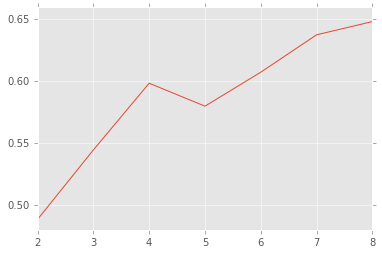

In [63]:
count_k = [2, 3, 4, 5, 6, 7, 8]
count_silhouette = list(zip(count_k, silhouette))
plt.plot(*zip(*count_silhouette))

# 5. Inspect the [best] clustering generated from question 4 
- a. List the number of data points in each cluster
C0:    32835
C1:    19150
C7:    11275
C3:    10725
C6:    10024
C5:     6779
C2:     5543
C4:     4026
- b. Were there clusters that represented very funny but useless reviewers? C0:    31473
- c. How many reviewers were in the cluster that represented relatively equal strength in all voting categories (assuming such a cluster exists in your clustering)? C1:  4101

In [67]:
# 5a. List the number of data points in each cluster (eg. C1: 2,000 C2: 4,200 etc)
pd.Series(clusters).value_counts()

0    32835
1    19150
7    11275
3    10725
6    10024
5     6779
2     5543
4     4026
dtype: int64

In [68]:
reviewers_q11_q13.loc[:, "cluster_number"] = clusters
reviewers_q11_q13.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,q11,q12,q13,cluster_number
1,0.0,0.0,100.0,0
3,0.0,0.0,100.0,0
5,0.0,0.0,100.0,0
6,25.0,0.0,75.0,3
9,0.0,50.0,50.0,5


In [108]:
# 5b. Were there clusters that represented very funny but useless reviewers?

#q11 = cool, q12 = funny, q13 = useful
reviewers_q11_q13_useless_funny95 = reviewers_q11_q13[(reviewers_q11_q13["q13"] <= 0.1) & (reviewers_q11_q13["q12"] >= 95.0)]

In [109]:
reviewers_q11_q13_useless_funny95["cluster_number"].value_counts()

2    5159
Name: cluster_number, dtype: int64

In [110]:
reviewers_q11_q13_useless_funny75 = reviewers_q11_q13[(reviewers_q11_q13["q13"] <= 0.1) & (reviewers_q11_q13["q12"] >= 75.0)]
reviewers_q11_q13_useless_funny75["cluster_number"].value_counts()

2    5225
Name: cluster_number, dtype: int64

When we set the threshold to be 95% funny votes and 0% useful votes (out of total votes) then we can see that there are 5159 reviewers that fall into one cluster (see reviewers_q11_q13_useless_funny95, cluster 2).

When we set the threshold to be 75% funny votes and 0% useful votes (out of total votes, i.e., if they got 1 cool vote and 3 funny votes) then we can see that there are 5225 reviewers that fall into one cluster (cluster 2, same cluster) (see reviewers_q11_q13_useless_funny75).

This is interesting because we can see that there are some more funny/useless points that fall into the first cluster (cluster 2 increases from 5159 to 5225) when we change the threshold to 75% funny votes.

In [83]:
# 5c. How many reviewers were in the cluster that represented relatively equal strength in all voting categories (assuming such a cluster exists in your clustering)?
reviewers_q11_q13_equal = reviewers_q11_q13[(reviewers_q11_q13["q12"] == 33.33) & (reviewers_q11_q13["q12"] == 33.33) & (reviewers_q11_q13["q13"] == 33.33)]

reviewers_q11_q13_equal["cluster_number"].value_counts()

# reviewers_q11_q13_equal

1    4101
Name: cluster_number, dtype: int64

When we look at only one when q11, q12, q13 are all 33.33 (or 1/3 equally of each vote), there is one cluster (C1: 4101)

# 6. Cluster the dataset using k = 5 and using features q7-q13 (log and % type votes) and q14 (most active year feature) and the natural log of q15 (avg review chars.)
- a. What is the silhouette metric for this clustering? You may use the max, as you did in question 2. For a more in-depth understanding of cluster analysis with silhouette; Answer = 0.36718922621787364
- b. What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters
    - C0:    4.959675
    - C1:    8.995139
    - C2:    7.828889 
    - C3:    4.873224
    - C4:    6.789233


In [127]:
# 6a.  a. What is the silhouette metric for this clustering? You may use the max, as you did in question 2. For a more in-depth understanding of cluster analysis with silhouette, look [ here ]

# reviewers.head()
reviewers_q715_q3 = reviewers.loc[:, ['q3', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
reviewers_q715_q3["q15"] = np.log(reviewers_q715_q3["q15"])
reviewers_q715_q3['q15'].replace(-np.inf,np.nan,inplace=True)
reviewers_q7_q15 = reviewers_q715_q3.loc[:, 'q7':'q15']
len(reviewers_q7_q15)

33426

In [128]:
# silhouette = []
# for num_clusters in range(2,9):
#     km = KMeans(n_clusters=num_clusters)
#     %time km.fit(reviewers_q7_q15)
#     clusters = km.labels_.tolist()
#     silhouette.append(silhouette_score(reviewers_q7_q15[0:10000], clusters[0:10000]))

CPU times: user 440 ms, sys: 20.6 ms, total: 460 ms
Wall time: 294 ms
CPU times: user 639 ms, sys: 8.01 ms, total: 647 ms
Wall time: 327 ms
CPU times: user 807 ms, sys: 37.9 ms, total: 844 ms
Wall time: 425 ms
CPU times: user 899 ms, sys: 37.8 ms, total: 937 ms
Wall time: 473 ms
CPU times: user 1.09 s, sys: 27.1 ms, total: 1.12 s
Wall time: 567 ms
CPU times: user 1.2 s, sys: 50.2 ms, total: 1.25 s
Wall time: 632 ms
CPU times: user 1.42 s, sys: 72.4 ms, total: 1.5 s
Wall time: 758 ms


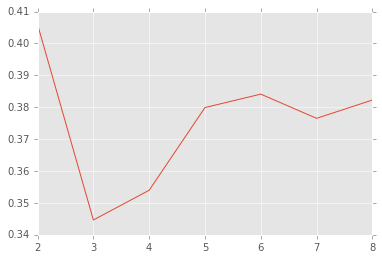

In [129]:
# count_k = [2, 3, 4, 5, 6, 7, 8]
# count_silhouette = list(zip(count_k, silhouette))
# plt.plot(*zip(*count_silhouette))

In [130]:
km = KMeans(n_clusters=5)
%time km.fit(reviewers_q7_q15)
clusters = km.labels_.tolist()
silhouette_k5 = silhouette_score(reviewers_q7_q15[0:10000], clusters[0:10000])
silhouette_k5

CPU times: user 1.11 s, sys: 81.9 ms, total: 1.19 s
Wall time: 640 ms


0.36718922621787364

In [133]:
silhouette_k5

0.36718922621787364

In [131]:
#  b. What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters (eg. C1: 1.4 C2: 4.2 C3: 3.4 etc)
# reviewers_q7q15.loc[:,'cluster_numbers'] = clusters
# reviewers_q7q15.join(reviewers.loc[:,'q3'])

reviewers_q715_q3.loc[:, "cluster_number"] = clusters
reviewers_q715_q3.head()

,q3,q7,q8,q9,q10,q11,q12,q13,q14,q15,cluster_number
13,2,0.69,0.00,1.39,0.00,16.67,66.67,16.67,7,5.830415,3
15,1,0.00,0.00,0.00,0.00,33.33,33.33,33.33,6,4.812184,0
16,12,2.48,1.95,1.61,2.08,35.00,25.00,40.00,4,6.433342,0
24,4,1.39,1.39,0.00,1.39,44.44,11.11,44.44,11,7.161234,1
26,1,0.00,0.00,0.00,0.00,33.33,33.33,33.33,8,5.521461,0


In [134]:
# b. What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters (eg. C1: 1.4 C2: 4.2 C3: 3.4 etc)
reviewers_q715_q3_cluster = reviewers_q715_q3.groupby("cluster_number")["q3"].mean()
reviewers_q715_q3_cluster

cluster_number
0    4.959675
1    8.995139
2    7.828889
3    4.873224
4    6.789233
Name: q3, dtype: float64

# 7. Cluster the dataset using the features described in question 6 + every group’s question 16 features (you may drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features.
- a. Using the silhouette metric, what was the best k?
- b. Using the the sum of within cluster variance metric with the elbow method what was the best k?


In [158]:
# reviewers.head()
reviewers_q716 = reviewers.loc[:, 'q7':'q16ac']
# del reviewers_q716['q16ab']
reviewers_q7_q16 = reviewers_q716.dropna() #remove na to calc clusters
reviewers_q7_q16.replace(-np.inf,np.nan,inplace=True)
len(reviewers_q7_q16)
# q6_df = reviewers_q7_q16

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [159]:
reviewers_q7_q16.loc[:,"q16a":]

,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
13,0,1.414214,0.008811,4.000000,0.030837,1.000000,0,0,0,3.000000,...,no,0.000000,48,8,0.000000,53.750000,0,0,3.000000,4.000000
15,0,0.000000,0.024390,4.000000,0.024390,0.000000,0,0,0,3.000000,...,no,0.000000,21,4,0.000000,11.500000,0,0,3.000000,4.000000
16,1,0.996205,0.002678,4.083333,0.030802,0.953794,5,10,0,1.666667,...,no,0.333333,16,49,0.003858,81.020833,6,2,1.666667,4.083333
24,0,1.154701,0.001746,4.000000,0.021343,1.000000,3,2,0,2.250000,...,no,1.000000,15,16,0.000905,139.875000,0,4,0.000000,4.000000
26,0,0.000000,0.012000,5.000000,0.016000,0.000000,0,1,0,3.000000,...,no,1.000000,3,5,0.012000,22.500000,0,0,0.000000,5.000000
30,2,1.488048,0.007597,4.250000,0.024862,1.391941,2,5,0,1.375000,...,yes,0.750000,1,34,0.006841,24.843750,0,0,0.000000,4.250000
42,1,2.000000,0.005750,3.000000,0.087207,1.788854,1,4,1,2.400000,...,no,0.400000,6,15,0.006773,69.000000,0,0,6.000000,3.000000
48,0,0.000000,0.008183,1.000000,0.058101,0.000000,1,1,1,10.000000,...,no,0.000000,17,1,0.015612,47.200000,0,0,1.000000,1.000000
55,1,1.133893,0.008679,4.428571,0.030769,1.049781,1,5,0,3.142857,...,no,1.000000,43,31,0.006819,51.000000,3,1,2.000000,4.428571
64,0,2.828427,0.029586,3.000000,0.029586,2.000000,0,1,0,7.500000,...,no,0.000000,45,6,0.001577,33.041667,0,0,1.500000,3.000000


In [ ]:
# reviewers_q7q15.loc[:,'cluster_numbers'] = clusters
# reviewers_q7q15.join(reviewers.loc[:,'q3'])

In [160]:
reviewers_q7_q16["q16s"].unique()
reviewers_q7_q16["q16s"] = pd.get_dummies(reviewers_q7_q16["q16s"])
reviewers_q7_q16["q16t"] = pd.get_dummies(reviewers_q7_q16["q16t"])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [178]:
# reviewers_q7_q16["q16s"] = reviewers_q7_q16["q16s"][]
reviewers_q7_q16.head()

,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16a,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
13,0.69,0.00,1.39,0.00,16.67,66.67,16.67,7,340.50,0,...,1.0,0.000000,48,8,0.000000,53.750000,0,0,3.000000,4.000000
15,0.00,0.00,0.00,0.00,33.33,33.33,33.33,6,123.00,0,...,1.0,0.000000,21,4,0.000000,11.500000,0,0,3.000000,4.000000
16,2.48,1.95,1.61,2.08,35.00,25.00,40.00,4,622.25,1,...,1.0,0.333333,16,49,0.003858,81.020833,6,2,1.666667,4.083333
24,1.39,1.39,0.00,1.39,44.44,11.11,44.44,11,1288.50,0,...,1.0,1.000000,15,16,0.000905,139.875000,0,4,0.000000,4.000000
26,0.00,0.00,0.00,0.00,33.33,33.33,33.33,8,250.00,0,...,1.0,1.000000,3,5,0.012000,22.500000,0,0,0.000000,5.000000


In [179]:
reviewers_q7_q16.replace(-np.inf,np.nan,inplace=True)
reviewers_q7_q16.head()
#columns q16z and q16aa have a lot of NaN's - these columns are sparse, so let's drop them

# reviewers_q7_q16_clean = reviewers_q7_q16
# del reviewers_q7_q16_clean['q16ab']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16a,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
13,0.69,0.00,1.39,0.00,16.67,66.67,16.67,7,340.50,0,...,1.0,0.000000,48,8,0.000000,53.750000,0,0,3.000000,4.000000
15,0.00,0.00,0.00,0.00,33.33,33.33,33.33,6,123.00,0,...,1.0,0.000000,21,4,0.000000,11.500000,0,0,3.000000,4.000000
16,2.48,1.95,1.61,2.08,35.00,25.00,40.00,4,622.25,1,...,1.0,0.333333,16,49,0.003858,81.020833,6,2,1.666667,4.083333
24,1.39,1.39,0.00,1.39,44.44,11.11,44.44,11,1288.50,0,...,1.0,1.000000,15,16,0.000905,139.875000,0,4,0.000000,4.000000
26,0.00,0.00,0.00,0.00,33.33,33.33,33.33,8,250.00,0,...,1.0,1.000000,3,5,0.012000,22.500000,0,0,0.000000,5.000000


In [163]:
# from scipy import stats
# reviewers_q7_q16_zscores = stats.zscore(reviewers_q7_q16)

In [182]:
reviewers_q7_q16.head()

,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16a,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
13,0.69,0.00,1.39,0.00,16.67,66.67,16.67,7,340.50,0,...,1.0,0.000000,48,8,0.000000,53.750000,0,0,3.000000,4.000000
15,0.00,0.00,0.00,0.00,33.33,33.33,33.33,6,123.00,0,...,1.0,0.000000,21,4,0.000000,11.500000,0,0,3.000000,4.000000
16,2.48,1.95,1.61,2.08,35.00,25.00,40.00,4,622.25,1,...,1.0,0.333333,16,49,0.003858,81.020833,6,2,1.666667,4.083333
24,1.39,1.39,0.00,1.39,44.44,11.11,44.44,11,1288.50,0,...,1.0,1.000000,15,16,0.000905,139.875000,0,4,0.000000,4.000000
26,0.00,0.00,0.00,0.00,33.33,33.33,33.33,8,250.00,0,...,1.0,1.000000,3,5,0.012000,22.500000,0,0,0.000000,5.000000


In [183]:
cols = list(reviewers_q7_q16.columns)
# cols.remove('ID')
# reviewers_q7_q16[cols]

reviewers_q7_q16_zscore = pd.DataFrame()

for col in cols:
    col_zscore = col + '_zscore'
    reviewers_q7_q16_zscore[col_zscore] = (reviewers_q7_q16[col] - reviewers_q7_q16[col].mean())/reviewers_q7_q16[col].std(ddof=0)
len(reviewers_q7_q16_zscore)
# reviewers_q7_q16

24205

CPU times: user 800 ms, sys: 82.3 ms, total: 882 ms
Wall time: 890 ms
CPU times: user 1.11 s, sys: 63.1 ms, total: 1.18 s
Wall time: 1.16 s
CPU times: user 1.14 s, sys: 65.8 ms, total: 1.21 s
Wall time: 1.19 s
CPU times: user 1.61 s, sys: 83.4 ms, total: 1.69 s
Wall time: 1.67 s
CPU times: user 2.01 s, sys: 104 ms, total: 2.12 s
Wall time: 2.09 s
CPU times: user 2.43 s, sys: 124 ms, total: 2.56 s
Wall time: 2.52 s
CPU times: user 2.39 s, sys: 348 ms, total: 2.74 s
Wall time: 2.7 s


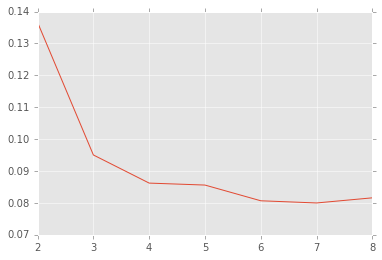

In [180]:
# 7a. Using the silhouette metric, what was the best k? K=2
silhouette = []
for num_clusters in range(2,9):
    km = KMeans(n_clusters=num_clusters)
    %time km.fit(reviewers_q7_q16_zscore)
    clusters = km.labels_.tolist()
    silhouette.append(silhouette_score(reviewers_q7_q16_zscore[0:10000], clusters[0:10000]))
count_k = [2, 3, 4, 5, 6, 7, 8]
count_silhouette = list(zip(count_k, silhouette))
plt.plot(*zip(*count_silhouette))

CPU times: user 919 ms, sys: 60.6 ms, total: 979 ms
Wall time: 986 ms
CPU times: user 1.22 s, sys: 62.8 ms, total: 1.29 s
Wall time: 1.28 s
CPU times: user 1.32 s, sys: 65.3 ms, total: 1.39 s
Wall time: 1.38 s
CPU times: user 1.35 s, sys: 63.1 ms, total: 1.41 s
Wall time: 1.39 s
CPU times: user 1.82 s, sys: 73.7 ms, total: 1.89 s
Wall time: 1.86 s
CPU times: user 1.92 s, sys: 88.5 ms, total: 2 s
Wall time: 1.97 s
CPU times: user 2.64 s, sys: 123 ms, total: 2.76 s
Wall time: 2.72 s


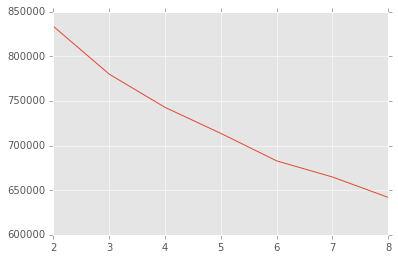

In [186]:
# 7b. Using the the sum of within cluster variance metric with the elbow method what was the
# best k? k=3
inertia = []
for num_clusters in range(2,9):
    km = KMeans(n_clusters=num_clusters)
    %time km.fit(reviewers_q7_q16_zscore)
    clusters = km.inertia_.tolist()
    inertia.append(clusters)
count_k = [2, 3, 4, 5, 6, 7, 8]
count_inertia = list(zip(count_k, inertia))
plt.plot(*zip(*count_inertia))

# 8. For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. This question answer should be submitted to a bCourses assignment in the form a pdf. This report is expected to be between 2 and 3 pages. It is meant to give you practice writing up your results. The report should have the following sections:
- RESEARCH QUESTION: Describe what it is you want to ask of this dataset (the question can not be the same as question 9)
- DATASET: describe the yelp_reviews to yelp_reviewers transformation.
    - subsection called FEATURES SELECTED: briefly describe the features from the dataset you choose (at least 1 features should be from a q16)
- METHODS: Briefly describe the methods you used (such as k-means) and why you used them
- RESULTS: Here you can tell the story of how you investigated the question (plots are always nice) and the conclusions you drew.
- NOTE: If you are hypothesizing that clusters might be formed with respect to a particular attribute, consider withholding that attribute from clustering and then looking to see what the mean value or distribution of that attribute is among the formed clusters.


In [4]:
#REsearch question: Do people who have an "all star" review (i.e., they review all categories of star) are they useful reviewers?
reviewers_useful_allstar = reviewers.loc[:, ['q6', 'q16l']]

In [61]:
df = reviewers_useful_allstar[0:15000]
new_df = df[df["q16l"]==1]
len(new_df)
df.head()


,q6,q16l
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


CPU times: user 1.44 s, sys: 50 ms, total: 1.49 s
Wall time: 808 ms
CPU times: user 1.91 s, sys: 124 ms, total: 2.03 s
Wall time: 1.05 s
CPU times: user 2.71 s, sys: 395 ms, total: 3.11 s
Wall time: 1.65 s
CPU times: user 3.05 s, sys: 494 ms, total: 3.55 s
Wall time: 1.87 s
CPU times: user 3.19 s, sys: 525 ms, total: 3.72 s
Wall time: 1.95 s
CPU times: user 3.49 s, sys: 627 ms, total: 4.12 s
Wall time: 2.18 s
CPU times: user 3.48 s, sys: 703 ms, total: 4.19 s
Wall time: 2.88 s


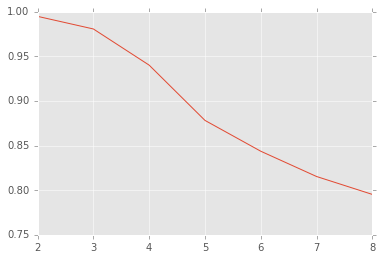

In [5]:
silhouette = []
for num_clusters in range(2,9):
    km = KMeans(n_clusters=num_clusters)
    %time km.fit(reviewers_useful_allstar)
    clusters = km.labels_.tolist()
    silhouette.append(silhouette_score(reviewers_useful_allstar[0:15000], clusters[0:15000]))
count_k = [2, 3, 4, 5, 6, 7, 8]
count_silhouette = list(zip(count_k, silhouette))
plt.plot(*zip(*count_silhouette))

In [11]:
#we get the highest silhouette count for k=2
count_silhouette

[(2, 0.9946721252322801),
 (3, 0.98054615871903517),
 (4, 0.94001648505113389),
 (5, 0.87812697099222081),
 (6, 0.84360483296519817),
 (7, 0.81529140390343646),
 (8, 0.79522202648738505)]

In [85]:
km = KMeans(n_clusters=8)
%time km.fit(reviewers_useful_allstar)
clusters = km.labels_.tolist()
silhouette_k8 = silhouette_score(reviewers_useful_allstar[0:10000], clusters[0:10000])
silhouette_k8

CPU times: user 1.61 s, sys: 469 ms, total: 2.08 s
Wall time: 2.09 s


0.79486343266002513

In [86]:
reviewers_useful_allstar.loc[:, "cluster_number"] = clusters

In [51]:
# len(reviewers_useful_allstar)
reviewers_useful_allstar["cluster_number"].value_counts()

5    149511
0     19944
4      1838
3       275
7        51
2        15
1         4
6         1
Name: cluster_number, dtype: int64

In [49]:
reviewers_allstar_clusters = reviewers_useful_allstar[(reviewers_useful_allstar["q16l"] == 1.0)]
reviewers_allstar_clusters["cluster_number"].value_counts()

0    1779
5     930
4     575
3     101
7      24
2       9
1       1
Name: cluster_number, dtype: int64

In [52]:
reviewers_useful_clusters = reviewers_useful_allstar[(reviewers_useful_allstar["q6"] >= 1.0)]
reviewers_useful_clusters["cluster_number"].value_counts()

5    68358
0    19944
4     1838
3      275
7       51
2       15
1        4
6        1
Name: cluster_number, dtype: int64

In [54]:
reviewers_useful_allstar_clusters = reviewers_useful_allstar[(reviewers_useful_allstar["q16l"] == 1.0) & (reviewers_useful_allstar["q6"] >= 40.0)]
reviewers_useful_allstar_clusters["cluster_number"].value_counts()

4    194
3    101
7     24
2      9
1      1
Name: cluster_number, dtype: int64

In [50]:
len(reviewers_useful_allstar[reviewers_useful_allstar["cluster_number"]==2])

15

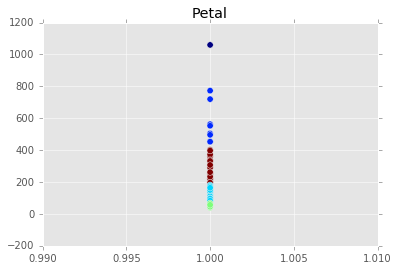

In [78]:
plt.scatter(reviewers_useful_allstar_clusters.q16l, reviewers_useful_allstar_clusters.q6, c=reviewers_useful_allstar_clusters.cluster_number, s=40)
plt.title('Petal')

In [ ]:
# reviewers_useful_allstar["cluster_number"] = reviewers_useful_allstar["cluster_number"].astype("category")
reviewers_useful_allstar.head()

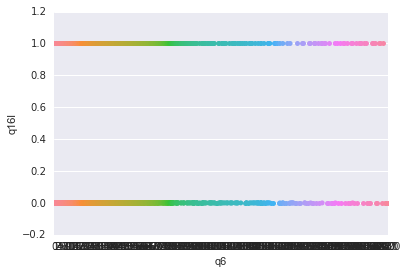

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.cm as cm
sns.stripplot(x="q6", y='q16l', data=reviewers_useful_allstar, jitter=True)
sns.despine()

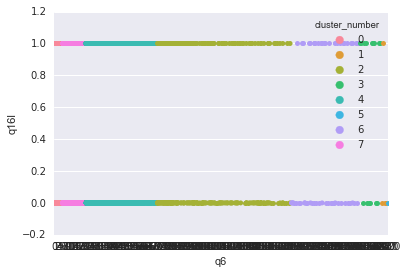

In [95]:
sns.stripplot(x="q6", y='q16l', hue="cluster_number", data=reviewers_useful_allstar, jitter=True)
sns.despine()

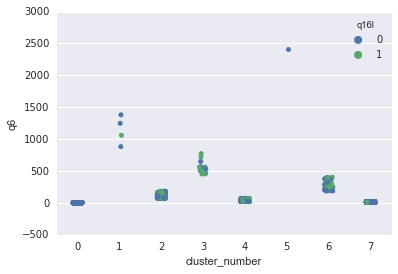

In [96]:
sns.stripplot(x="cluster_number", y='q6', hue="q16l", data=reviewers_useful_allstar, jitter=True)
sns.despine()

# Now let's explore by zscore -- does that make a difference? (it doesn't.)

In [59]:
reviewers_useful_allstar = reviewers.loc[:, ['q6', 'q16l']]
cols = list(reviewers_useful_allstar.columns)

reviewers_useful_allstar_zscore = pd.DataFrame()

for col in cols:
    col_zscore = col + '_zscore'
    reviewers_useful_allstar_zscore[col_zscore] = (reviewers_useful_allstar[col] - reviewers_useful_allstar[col].mean())/reviewers_useful_allstar[col].std(ddof=0)
len(reviewers_useful_allstar_zscore)
reviewers_useful_allstar_zscore.head()

,q6_zscore,q16l_zscore
0,-0.197040,-0.142564
1,-0.117732,-0.142564
2,-0.197040,-0.142564
3,-0.117732,-0.142564
4,-0.197040,-0.142564


CPU times: user 395 ms, sys: 23.5 ms, total: 419 ms
Wall time: 442 ms
CPU times: user 653 ms, sys: 91.9 ms, total: 745 ms
Wall time: 765 ms
CPU times: user 1.48 s, sys: 301 ms, total: 1.78 s
Wall time: 1.83 s
CPU times: user 1.83 s, sys: 453 ms, total: 2.28 s
Wall time: 2.34 s
CPU times: user 1.6 s, sys: 522 ms, total: 2.12 s
Wall time: 2.29 s
CPU times: user 1.58 s, sys: 534 ms, total: 2.12 s
Wall time: 2.1 s
CPU times: user 1.84 s, sys: 625 ms, total: 2.47 s
Wall time: 2.44 s


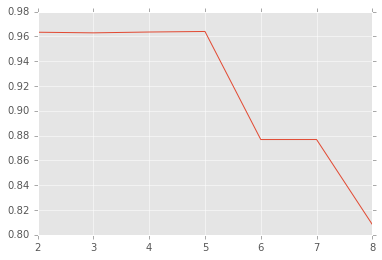

In [60]:
silhouette = []
for num_clusters in range(2,9):
    km = KMeans(n_clusters=num_clusters)
    %time km.fit(reviewers_useful_allstar_zscore)
    clusters = km.labels_.tolist()
    silhouette.append(silhouette_score(reviewers_useful_allstar_zscore[0:15000], clusters[0:15000]))
count_k = [2, 3, 4, 5, 6, 7, 8]
count_silhouette = list(zip(count_k, silhouette))
plt.plot(*zip(*count_silhouette))

In [65]:
reviewers_useful_allstar_zscore.loc[:, "cluster_number"] = clusters


In [67]:
reviewers_useful_allstar_zscore["cluster_number"].value_counts()

3    153016
0     14270
1      3327
7       826
4       166
6        29
2         4
5         1
Name: cluster_number, dtype: int64

In [66]:
reviewers_useful_allstar_clusters_zscore = reviewers_useful_allstar_zscore[(reviewers_useful_allstar_zscore["q16l_zscore"] >= 0) & (reviewers_useful_allstar_zscore["q6_zscore"] >= 0.0)]
reviewers_useful_allstar_clusters_zscore["cluster_number"].value_counts()

1    2824
4      75
6      16
2       1
Name: cluster_number, dtype: int64

# 9. Bonus question (+15%) - Reviewer overlap: Create a dataset with f reviewers as the rows and business_ids as the columns (there are a lot) where the feature value is is ‘1’ if the reviewer has written a review for that business and ‘0’ if not. Use the methods described in this assignment to answer the question of how much overlap of businesses reviewed exists among reviewers in this dataset. Append this answer to your question 8 document.
